## Task 5.1

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
from math import sqrt

In [2]:
df = pd.read_csv('../Module 1/TCS.csv')
df.head()

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,TCS,EQ,15-May-2017,2360.65,2375.1,2377.95,2341.60,2368.00,2365.10,2352.60,908802,2.138043e+09,30047,712450,78.39
1,TCS,EQ,16-May-2017,2365.10,2380.0,2435.00,2373.45,2425.10,2429.15,2410.26,1800513,4.339703e+09,58476,1167534,64.84
2,TCS,EQ,17-May-2017,2429.15,2433.5,2460.75,2423.00,2450.00,2455.35,2443.31,1438099,3.513729e+09,86412,1031752,71.74
3,TCS,EQ,18-May-2017,2455.35,2450.0,2572.00,2442.25,2525.00,2536.20,2525.78,2569297,6.489478e+09,111566,1135613,44.20
4,TCS,EQ,19-May-2017,2536.20,2536.2,2540.55,2486.00,2503.85,2507.15,2506.58,893022,2.238430e+09,63112,517461,57.94


In [3]:
df = df[df.Series == 'EQ']
df.shape

(494, 15)

In [4]:
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index('Date')
df.rename_axis(None, inplace=True)
df.head()

,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
2017-05-15,TCS,EQ,2360.65,2375.1,2377.95,2341.60,2368.00,2365.10,2352.60,908802,2.138043e+09,30047,712450,78.39
2017-05-16,TCS,EQ,2365.10,2380.0,2435.00,2373.45,2425.10,2429.15,2410.26,1800513,4.339703e+09,58476,1167534,64.84
2017-05-17,TCS,EQ,2429.15,2433.5,2460.75,2423.00,2450.00,2455.35,2443.31,1438099,3.513729e+09,86412,1031752,71.74
2017-05-18,TCS,EQ,2455.35,2450.0,2572.00,2442.25,2525.00,2536.20,2525.78,2569297,6.489478e+09,111566,1135613,44.20
2017-05-19,TCS,EQ,2536.20,2536.2,2540.55,2486.00,2503.85,2507.15,2506.58,893022,2.238430e+09,63112,517461,57.94


In [5]:
df['Daily Return'] = df['Close Price'].pct_change()*100
df.dropna(inplace = True)
df.head()

,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,Daily Return
2017-05-16,TCS,EQ,2365.10,2380.0,2435.00,2373.45,2425.10,2429.15,2410.26,1800513,4.339703e+09,58476,1167534,64.84,2.708131
2017-05-17,TCS,EQ,2429.15,2433.5,2460.75,2423.00,2450.00,2455.35,2443.31,1438099,3.513729e+09,86412,1031752,71.74,1.078567
2017-05-18,TCS,EQ,2455.35,2450.0,2572.00,2442.25,2525.00,2536.20,2525.78,2569297,6.489478e+09,111566,1135613,44.20,3.292810
2017-05-19,TCS,EQ,2536.20,2536.2,2540.55,2486.00,2503.85,2507.15,2506.58,893022,2.238430e+09,63112,517461,57.94,-1.145414
2017-05-22,TCS,EQ,2507.15,2510.0,2553.75,2510.00,2535.00,2531.35,2530.69,831970,2.105461e+09,53261,509741,61.27,0.965239


In [6]:
mean_daily_return = df['Daily Return'].mean()
std_daily_return = df['Daily Return'].std()
print(mean_daily_return,std_daily_return)

0.02977261015036365 2.7189323116884423


In [7]:
annual_mean = mean_daily_return *252
annual_std = std_daily_return* sqrt(252)

In [8]:
print('The mean expected annual return of the stock TCS is:', round(annual_mean,2),
     '\nAnd the volatility is:', round(annual_std,2))

The mean expected annual return of the stock TCS is: 7.5 
And the volatility is: 43.16


## Task 5.2

In [9]:
df_1 = pd.read_csv('../Stocks/Large_Cap/RELIANCE.csv')
df_2 = pd.read_csv('../Stocks/Large_Cap/MARUTI.csv')
df_3 = pd.read_csv('../Stocks/Mid_Cap/RBLBANK.csv')
df_4 = pd.read_csv('../Stocks/Mid_Cap/MINDTREE.csv')
df_5 = pd.read_csv('../Stocks/Small_Cap/FORTIS.csv')

In [10]:
def pre_process(df):
    df = df[df.Series == 'EQ']
    df['Date'] = pd.to_datetime(df['Date'])
    df = df.set_index('Date')
    df.rename_axis(None, inplace=True)
    df['Daily_Return'] = df['Close Price'].pct_change()*100
    df.dropna(inplace = True)
    return df

In [11]:
df_1 = pre_process(df_1)
df_1.head()

,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,Daily_Return
2017-05-16,RELIANCE,EQ,1344.10,1346.05,1376.90,1341.00,1356.20,1356.30,1360.59,2892947,3.936121e+09,79767,1238129,42.80,0.907671
2017-05-17,RELIANCE,EQ,1356.30,1353.00,1365.95,1347.75,1350.00,1353.10,1354.16,2250304,3.047263e+09,56277,1225837,54.47,-0.235936
2017-05-18,RELIANCE,EQ,1353.10,1340.25,1350.00,1324.10,1327.45,1327.35,1336.14,2237916,2.990178e+09,84723,1339478,59.85,-1.903037
2017-05-19,RELIANCE,EQ,1327.35,1333.00,1335.70,1310.00,1318.20,1318.85,1321.99,2928883,3.871940e+09,115988,1444387,49.32,-0.640374
2017-05-22,RELIANCE,EQ,1318.85,1326.50,1333.60,1315.20,1326.00,1324.15,1322.82,2011859,2.661318e+09,89828,1123947,55.87,0.401865


In [12]:
df_2 = pre_process(df_2)
df_3 = pre_process(df_3)
df_4 = pre_process(df_4)
df_5 = pre_process(df_5)

In [13]:
df_list = [df_1, df_2, df_3, df_4, df_5]
names = []
for df_x in df_list:
    names.append(df_x.Symbol.unique().tolist())
names = [item for sublist in names for item in sublist]
names

['RELIANCE', 'MARUTI', 'RBLBANK', 'MINDTREE', 'FORTIS']

In [14]:
df_all = pd.concat([df_1['Close Price'],df_2['Close Price'],df_3['Close Price'],df_4['Close Price'],df_5['Close Price']], axis=1)
df_all.columns = names
df_all.head()

,RELIANCE,MARUTI,RBLBANK,MINDTREE,FORTIS
2017-05-16,1356.30,6953.95,562.60,511.30,207.90
2017-05-17,1353.10,6958.20,564.25,506.35,205.90
2017-05-18,1327.35,6831.05,552.15,492.90,196.85
2017-05-19,1318.85,6790.55,555.45,497.50,203.55
2017-05-22,1324.15,6701.70,544.85,502.35,194.80


In [15]:
weights = np.asarray([0.2,0.2,0.2,0.2,0.2])
returns = df_all.pct_change()*100
returns.dropna(inplace=True)
returns.head()

,RELIANCE,MARUTI,RBLBANK,MINDTREE,FORTIS
2017-05-17,-0.235936,0.061116,0.293281,-0.968120,-0.962001
2017-05-18,-1.903037,-1.827340,-2.144440,-2.656265,-4.395338
2017-05-19,-0.640374,-0.592881,0.597664,0.933252,3.403607
2017-05-22,0.401865,-1.308436,-1.908363,0.974874,-4.298698
2017-05-23,-1.404675,2.643359,-3.734973,-0.238877,0.898357


In [16]:
mean_daily = returns.mean()
cov_matrix = returns.cov()
cov_matrix

,RELIANCE,MARUTI,RBLBANK,MINDTREE,FORTIS
RELIANCE,7.669823,0.433109,0.906898,0.421278,0.431004
MARUTI,0.433109,2.013848,0.656051,0.300996,0.151260
RBLBANK,0.906898,0.656051,2.661698,0.529276,0.583963
MINDTREE,0.421278,0.300996,0.529276,4.636801,0.460018
FORTIS,0.431004,0.151260,0.583963,0.460018,7.052370


In [17]:
annual_portfolio_return = np.sum(mean_daily * weights)*252
annual_portfolio_std = sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))*sqrt(252)

In [18]:
print('The Mean Expected Annual Return of the Portfolio is:', round(annual_portfolio_return,2),
     '\nAnd the Portfolio Volatility is:', round(annual_portfolio_std,2))

The Mean Expected Annual Return of the Portfolio is: 8.61 
And the Portfolio Volatility is: 18.45


Hence according to Modern Portfolio Theory, we have created a portfolio that will maximize returns for lesser risk than investing in a single stock.

## Task 5.3

In [19]:
efficient_frontier = pd.DataFrame()
for i in range(10000):
    weights  = np.random.rand(df_all.shape[1])
    weights  = np.round(weights, 3) 
    weights /= weights.sum()
    
    portfolio_return = np.sum(mean_daily*weights)*252
    
    portfolio_volatility = sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))*sqrt(252)
    
    portfolio_sharpe = portfolio_return/portfolio_volatility
    
    efficient_frontier = efficient_frontier.append([{
        "weights":    np.round(weights,6),
        "returns":    portfolio_return,
        "volatility": portfolio_volatility,
        "sharpe":     portfolio_sharpe
    }])
efficient_frontier.reset_index(inplace=True, drop=True)
efficient_frontier.head()

,weights,returns,volatility,sharpe
0,"[0.207878, 0.249555, 0.204574, 0.227954, 0.110...",11.169869,17.992009,0.620824
1,"[0.217781, 0.106089, 0.189391, 0.335077, 0.151...",14.718385,19.761136,0.744815
2,"[0.066602, 0.23149, 0.151633, 0.317168, 0.233107]",11.012682,18.664838,0.590023
3,"[0.179097, 0.064769, 0.15947, 0.226693, 0.369971]",6.496899,21.840613,0.297469
4,"[0.384799, 0.200557, 0.234381, 0.042579, 0.137...",5.326293,22.017670,0.241910


## Task 5.4

In [20]:
max_sharpe = efficient_frontier.loc[efficient_frontier['sharpe'].idxmax()]
max_sharpe

weights       [0.076514, 0.115768, 0.210246, 0.59481, 0.002661]
returns                                                  26.229
volatility                                              23.0778
sharpe                                                  1.13655
Name: 7969, dtype: object

In [21]:
min_volatility = efficient_frontier.loc[efficient_frontier['volatility'].idxmin()]
min_volatility

weights       [0.097933, 0.419783, 0.206201, 0.162402, 0.113...
returns                                                 7.55655
volatility                                              16.6428
sharpe                                                 0.454043
Name: 1986, dtype: object

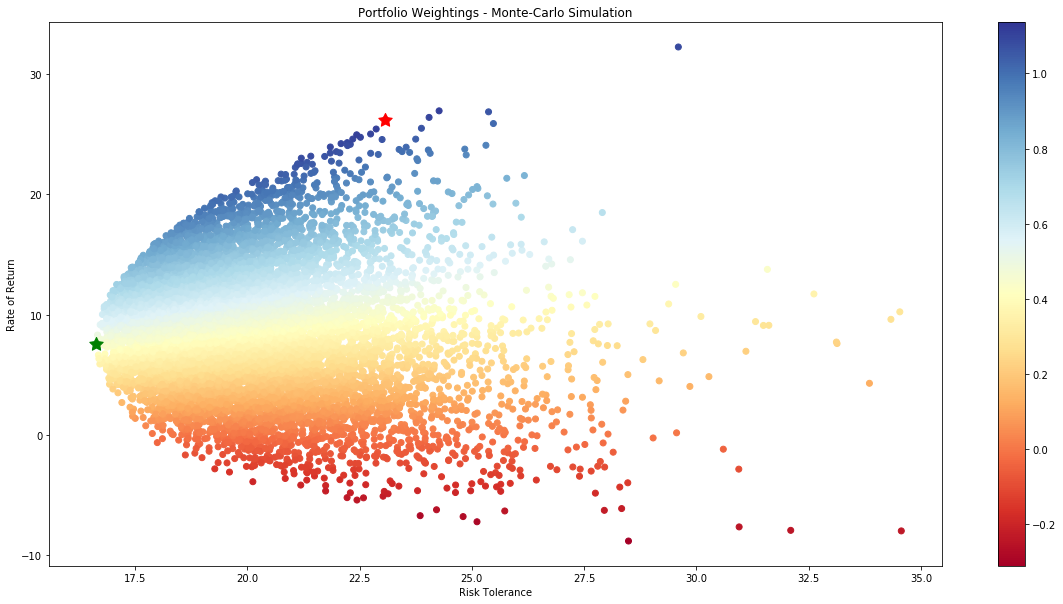

In [22]:
fig, ax = plt.subplots(figsize=(20, 10), nrows=1, ncols=1)
plt.scatter( 
    efficient_frontier.volatility,     
    efficient_frontier.returns, 
    c = efficient_frontier.sharpe,
    cmap = 'RdYlBu'
)
plt.title('Portfolio Weightings - Monte-Carlo Simulation')
plt.ylabel('Rate of Return')
plt.xlabel('Risk Tolerance')
plt.colorbar()

# Mark the 2 portfolios where
plt.scatter( max_sharpe.volatility,     max_sharpe.returns,     marker=(5,1,0), c='r', s=200 )
plt.scatter( min_volatility.volatility, min_volatility.returns, marker=(5,1,0), c='g', s=200 );